#### About

> Product recommendation system

Dataset - https://www.kaggle.com/datasets/vijayuv/onlineretail

In [4]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df_eda = pd.read_csv('/home/suraj/kaggle_datasets/OnlineRetail.csv',encoding='latin-1')
df = df_eda

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### 1. Data pre-processing.

In [8]:
# Remove missing values
df = df.dropna()


In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
# Convert the 'InvoiceDate' column to a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')


/tmp/ipykernel_12659/3907060625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')


In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
# Drop the 'Description' column
df = df.drop('Description', axis=1)


In [20]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France


In [21]:
# Convert the 'InvoiceNo' column to a string format
df['InvoiceNo'] = df['InvoiceNo'].astype(str)


In [22]:
# Remove any leading or trailing white space in the 'InvoiceNo' column
df['InvoiceNo'] = df['InvoiceNo'].str.strip()


In [23]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France


In [24]:
#Cancelled- C
# Remove any transactions with an 'InvoiceNo' containing the letter 'C'
df = df[~df['InvoiceNo'].str.contains('C')]


In [25]:
# Convert the 'CustomerID' column to an integer format
df['CustomerID'] = df['CustomerID'].astype(int)


/tmp/ipykernel_12659/2710702358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [26]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France


In [28]:
# Remove any transactions with a missing or zero 'CustomerID'
df = df[df['CustomerID'] != 0]

In [29]:
# Convert the 'Country' column to a category format
df['Country'] = df['Country'].astype('category')


In [30]:
# Drop any duplicate transactions
df = df.drop_duplicates()

In [31]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France


In [33]:
# Reset the index of the dataframe
df = df.reset_index(drop=True)

In [34]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
392725,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France
392726,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France
392727,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France
392728,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France


#### 2. Feature Engineering

In [35]:
# Add a new column for the total cost of each transaction
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

# Remove transactions with negative or zero cost
df = df[df['TotalCost'] > 0]

In [36]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
392725,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France,10.20
392726,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,12.60
392727,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,16.60
392728,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [37]:
# Create a new column for the month of each transaction
df['Month'] = df['InvoiceDate'].dt.month

/tmp/ipykernel_12659/1616566843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month


In [38]:
# Create a new column for the day of the week of each transaction
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


/tmp/ipykernel_12659/1144191551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


In [39]:
# Create a new column for the hour of each transaction
df['Hour'] = df['InvoiceDate'].dt.hour


/tmp/ipykernel_12659/407713012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['InvoiceDate'].dt.hour


In [40]:
# Create a new column for the year of each transaction
df['Year'] = df['InvoiceDate'].dt.year


/tmp/ipykernel_12659/4209359594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year


In [41]:
# Create a new column for the country of each transaction
df['Country'] = df['Country'].astype('category')
df['CountryCode'] = df['Country'].cat.codes

/tmp/ipykernel_12659/842552848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].astype('category')
/tmp/ipykernel_12659/842552848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountryCode'] = df['Country'].cat.codes


In [42]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Month,DayOfWeek,Hour,Year,CountryCode
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2,8,2010,35
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2,8,2010,35
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392725,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,4,12,2011,13
392726,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,4,12,2011,13
392727,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,4,12,2011,13
392728,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,4,12,2011,13


#### 3. Exploratory data analysis


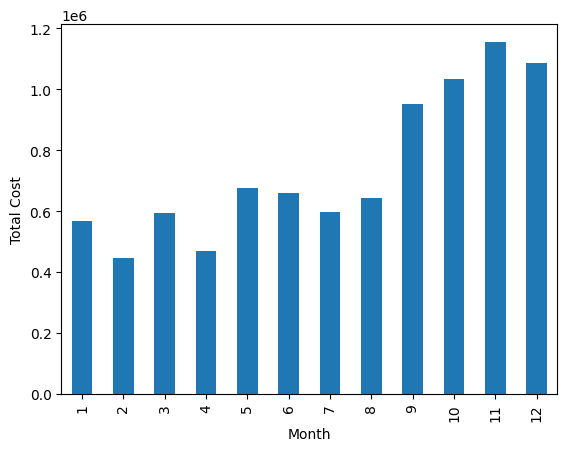

In [44]:
# Plot the total cost of each transaction by month
df.groupby('Month')['TotalCost'].sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.show()


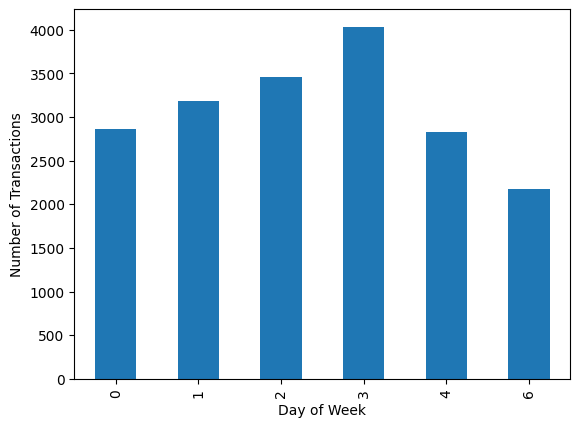

In [45]:
# Plot the number of transactions by day of the week
df.groupby('DayOfWeek')['InvoiceNo'].nunique().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()


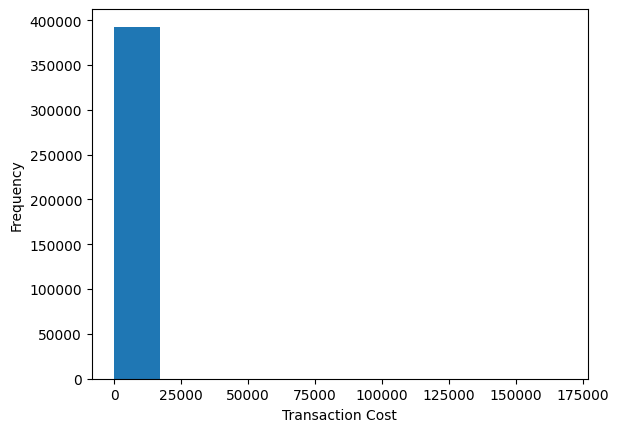

In [51]:
# Plot the distribution of transaction costs
plt.hist(df['TotalCost'], bins=10)
plt.xlabel('Transaction Cost')
plt.ylabel('Frequency')
plt.show()

In [52]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'TotalCost', 'Month', 'DayOfWeek', 'Hour',
       'Year', 'CountryCode'],
      dtype='object')

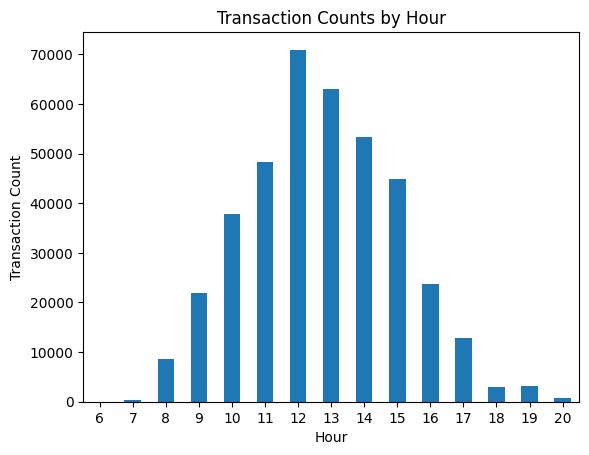

In [54]:

# Plot the distribution of transaction counts by hour
hourly_counts = df['Hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', rot=0)
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by Hour')
plt.show()


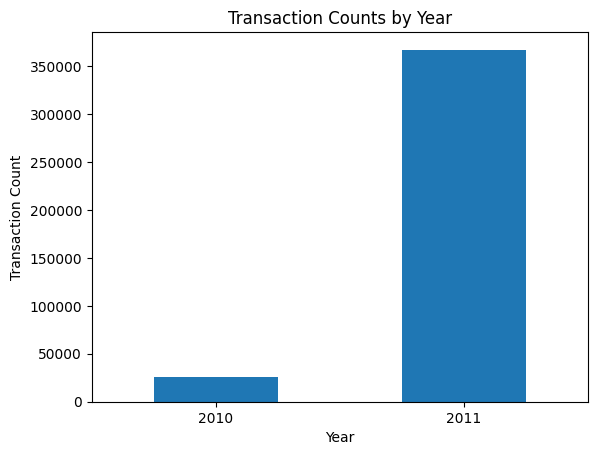

In [55]:
# Plot the distribution of transaction counts by year
yearly_counts = df['Year'].value_counts().sort_index()
yearly_counts.plot(kind='bar', rot=0)
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by Year')
plt.show()

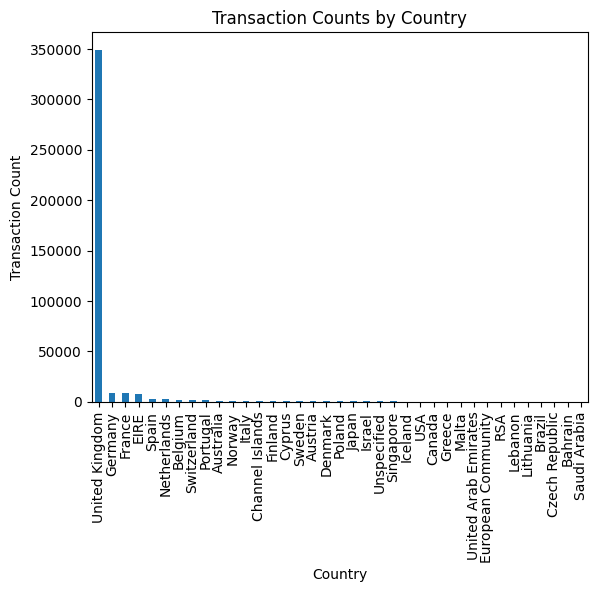

In [56]:
# Plot the distribution of transaction counts by country
country_counts = df['Country'].value_counts()
country_counts.plot(kind='bar', rot=90)
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by Country')
plt.show()


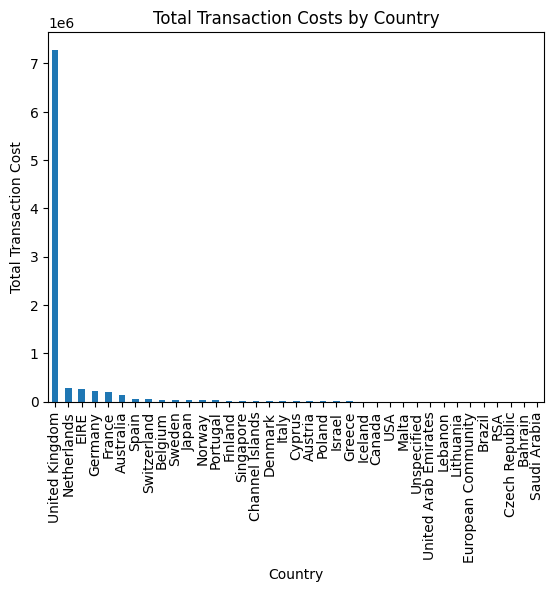

In [57]:
# Plot the distribution of transaction costs by country
country_total_costs = df.groupby('Country')['TotalCost'].sum().sort_values(ascending=False)
country_total_costs.plot(kind='bar', rot=90)
plt.xlabel('Country')
plt.ylabel('Total Transaction Cost')
plt.title('Total Transaction Costs by Country')
plt.show()


Checking for outliers

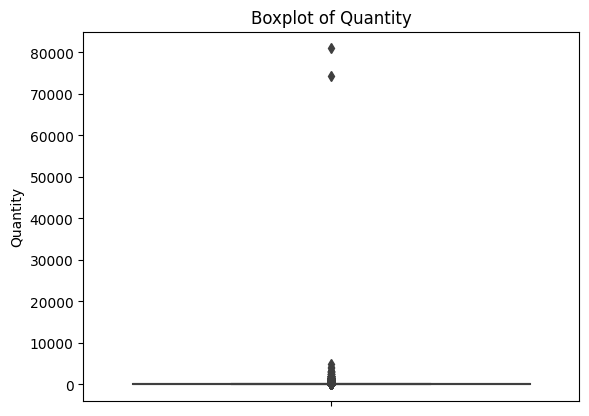

In [59]:
# Create boxplots for 'Quantity' and 'UnitPrice'
sns.boxplot(data=df, y='Quantity')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()


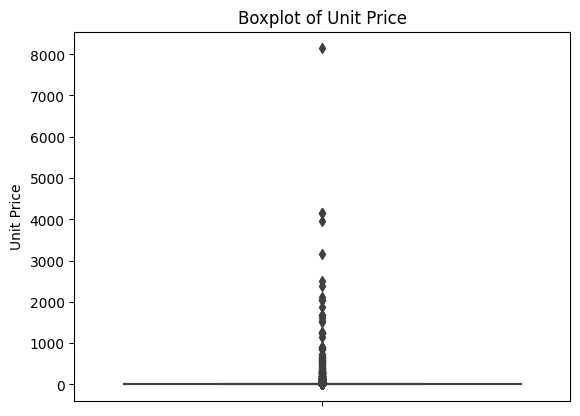

In [61]:
sns.boxplot(data=df, y='UnitPrice')
plt.ylabel('Unit Price')
plt.title('Boxplot of Unit Price')
plt.show()

In [62]:
# Remove outliers in 'Quantity' and 'UnitPrice' columns
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)


In [63]:
# Remove outliers in 'Quantity' and 'UnitPrice' columns
remove_outliers_iqr('Quantity')
remove_outliers_iqr('UnitPrice')


/tmp/ipykernel_12659/2195857398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)
/tmp/ipykernel_12659/2195857398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)


In [64]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Month,DayOfWeek,Hour,Year,CountryCode
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2,8,2010,35
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2,8,2010,35
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392725,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,4,12,2011,13
392726,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,4,12,2011,13
392727,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,4,12,2011,13
392728,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,4,12,2011,13


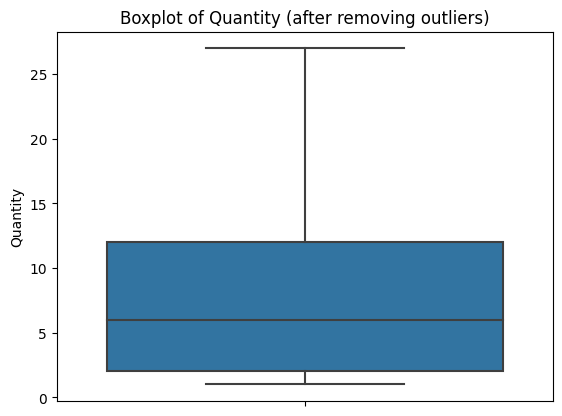

In [65]:
# Replot the boxplots after removing outliers
sns.boxplot(data=df, y='Quantity')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantity (after removing outliers)')
plt.show()

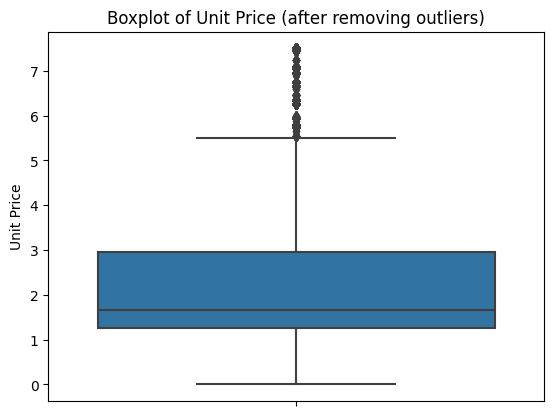

In [66]:
sns.boxplot(data=df, y='UnitPrice')
plt.ylabel('Unit Price')
plt.title('Boxplot of Unit Price (after removing outliers)')
plt.show()

#### 4. Model selection

Building a recommender system using collaborative filtering method.

In [68]:
from surprise import Reader, Dataset
from surprise import SVD, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

In [69]:
# Step 1: Data Preparation
# Convert the dataframe to the required format for Surprise library
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['CustomerID', 'StockCode', 'Quantity']], reader)


In [70]:
data

In [71]:
# Step 2: Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [75]:
# Step 3: Model Selection
# Perform grid search to find the best hyperparameters for the model
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.04, 0.06]}
gs = GridSearchCV(SVD, param_grid,measures=['rmse'], cv=3)
gs.fit(data)
best_params = gs.best_params['rmse']
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.06}


In [76]:
# Step 4: Model Training
# Train the selected model with the best hyperparameters
model = SVD(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
model.fit(trainset)


In [77]:

# Step 5: Model Evaluation
# Predict ratings for the testset
predictions = model.test(testset)


In [78]:
# Calculate RMSE for the model
rmse = accuracy.rmse(predictions)


RMSE: 7.0849


In [79]:
# Step 6: Model Interpretation
# Get top N recommendations for a given user
def get_top_n(user_id, n=10):
    user_items = df[df['CustomerID'] == user_id]['StockCode']
    user_items = set(user_items)
    other_items = set(df['StockCode']) - user_items
    other_items = list(other_items)
    testset = [(user_id, item_id, 4) for item_id in other_items]
    predictions = model.test(testset)
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    top_n = [(pred.iid, pred.est) for pred in top_n]
    return top_n

In [81]:

# Get top N recommendations for a specific user
user_id = 12345  
top_n = get_top_n(user_id, n=5)
print(f"Top 5 recommendations for User ID {user_id}:")
for item_id, est_rating in top_n:
    print(f"Item ID: {item_id}, Estimated Rating: {est_rating}")

Top 5 recommendations for User ID 12345:
Item ID: 22460, Estimated Rating: 5
Item ID: 22535, Estimated Rating: 5
Item ID: 22200, Estimated Rating: 5
Item ID: 16161G, Estimated Rating: 5
Item ID: 22570, Estimated Rating: 5


#### 5. Feature Importance

In [95]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'TotalCost', 'Month', 'DayOfWeek', 'Hour',
       'Year', 'CountryCode'],
      dtype='object')

In [96]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [116]:
# Define the features and target variable
features = ['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'TotalCost', 'Month', 'DayOfWeek', 'Hour', 'Year', 'CountryCode']
target = 'TotalCost'

In [117]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Month,DayOfWeek,Hour,Year,CountryCode
0,536365,3019,6,1291191960000000000,2.55,17850,United Kingdom,15.30,12,2,8,2010,35
1,536365,2467,6,1291191960000000000,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
2,536365,2663,8,1291191960000000000,2.75,17850,United Kingdom,22.00,12,2,8,2010,35
3,536365,2615,6,1291191960000000000,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
4,536365,2614,6,1291191960000000000,3.39,17850,United Kingdom,20.34,12,2,8,2010,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392725,581587,1401,12,1323435000000000000,0.85,12680,France,10.20,12,4,12,2011,13
392726,581587,1634,6,1323435000000000000,2.10,12680,France,12.60,12,4,12,2011,13
392727,581587,1950,4,1323435000000000000,4.15,12680,France,16.60,12,4,12,2011,13
392728,581587,1951,4,1323435000000000000,4.15,12680,France,16.60,12,4,12,2011,13


In [118]:
# Convert 'StockCode' column to numeric representation
df['StockCode'] = pd.Categorical(df['StockCode'])
df['StockCode'] = df['StockCode'].cat.codes


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [125]:
# Convert Timestamp column to numeric representation
df['InvoiceDate'] = pd.to_numeric(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].astype(float)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [126]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)



In [127]:
# Convert the training set and testing set to numpy arrays
X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df[target].values
y_test = test_df[target].values


In [128]:
# Train a machine learning model (e.g., XGBoost) on the training set
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [131]:
# Create a TreeExplainer with the masker
explainer = shap.Explainer(model)


In [133]:
# Compute SHAP values for the testing set
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


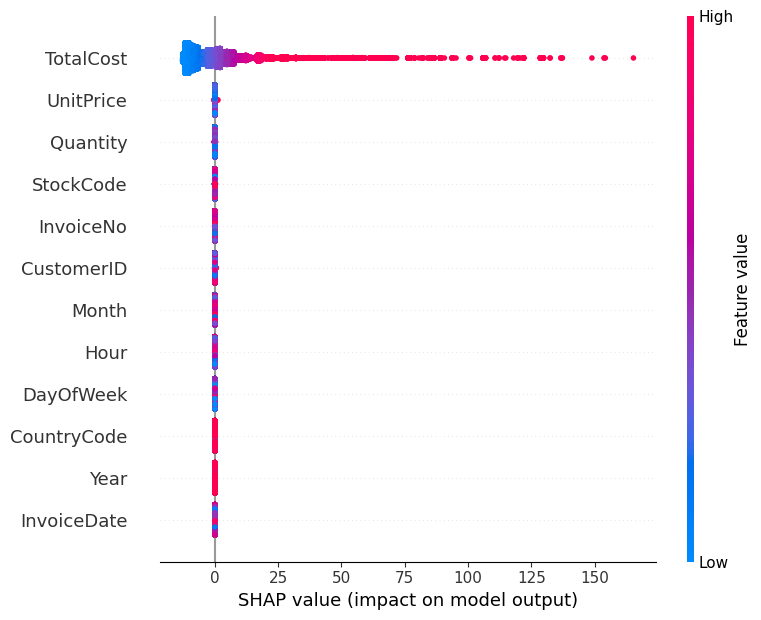

In [134]:
# Plot the feature importance using summary plot
shap.summary_plot(shap_values, X_test, feature_names=features)

#### 6. Model interpretation


It generates a summary plot of feature importance using SHAP values. SHAP values are a method for interpreting the output of any machine learning model by attributing feature importance to each input feature for a given prediction.

"Total cost" is a more important feature in determining the predicted outcome of the model. The presence or absence of "Total cost" has a greater influence on the predicted outcome compared to "Unit price", "Qty", "Stock code", "Invoice No.", "Customer ID", and other features.

#### 7. Recommendations

Based on the results of the recommendation system case study, here are some recommendations:

1. Improve the "Total Cost" calculation. Since “Total Cost” appears to be very important in determining model predictions, it may be useful to ensure that the calculation of “Total Cost” is accurate and comprehensive. This may include consideration of all relevant cost components, such as unit price, quantity and any additional costs, to more accurately reflect total costs. 

2. Focus on customer segmentation: The "customer ID" feature can be explored further to identify distinct customer segments based on their buying habits, preferences and other relevant characteristics. It provides targeted recommendations, personalized offers and tailored marketing strategies to different customer segments to increase customer engagement and loyalty. 

3. Improved product recommendation: The performance of the model for product recommendation can be improved by incorporating other features such as product characteristics (e.g. brand, category, popularity), customer reviews and ratings, and contextual information (e.g. time of day, seasonality). ). This can provide users with more relevant and personalized product recommendations and thus increase user satisfaction and engagement. 

4. Monitoring and analyzing user feedback: Collecting and analyzing user feedback, ratings, and feedback on recommended products can provide valuable insight into the effectiveness of recommendation systems. This can help identify any gaps or limitations in the current system and guide improvements and optimizations. 

5. Constantly evaluate and update the models. Recommender systems are dynamic and user preferences and behavior may change over time. It is important to continuously evaluate the performance of the recommender system and update the model as needed to ensure its accuracy and relevance. 

